In [138]:
!pip install ucimlrepo

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


[ 2.81935977 26.22566926  4.48611815 ... 15.67088152  5.19248228
 20.22260979]
0.003343877592655684     0.999963466712514


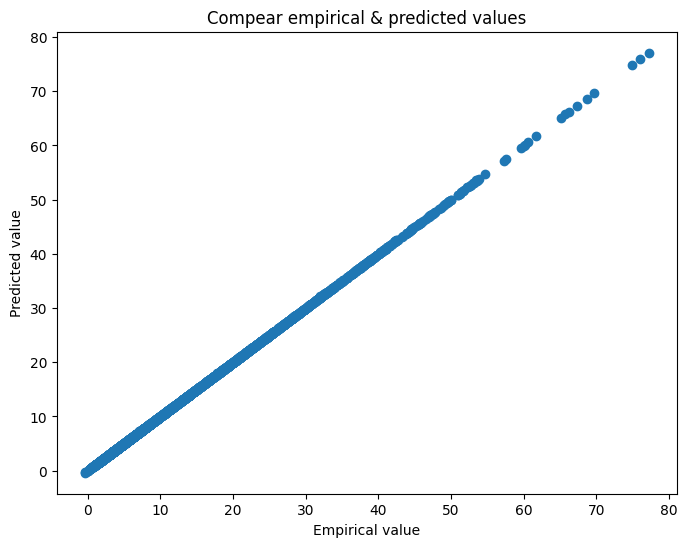

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

def __main__():
    individual_household_electric_power_consumption = fetch_ucirepo(id = 235)

    X = individual_household_electric_power_consumption.data.features[::60]
    y = individual_household_electric_power_consumption.data.targets

    x_time = pd.to_datetime(X['Date'] + ' ' + X['Time'], yearfirst = True, dayfirst = False)

    global_active_power = pd.to_numeric(X['Global_active_power'], errors='coerce')
    voltage = pd.to_numeric(X['Voltage'], errors='coerce')
    global_intensity = pd.to_numeric(X['Global_intensity'], errors='coerce')
    sub_metering_1 = pd.to_numeric(X['Sub_metering_1'], errors='coerce')
    sub_metering_2 = pd.to_numeric(X['Sub_metering_2'], errors='coerce')
    sub_metering_3 = pd.to_numeric(X['Sub_metering_3'], errors='coerce')

    X_features = pd.DataFrame({
        'Global_active_power' : global_active_power,
        'sub_metering_1' : sub_metering_1,
        'sub_metering_2' : sub_metering_2,
        'sub_metering_3' : sub_metering_3,
        'month': x_time.dt.month,
        'dayofweek': x_time.dt.dayofweek,
        'hour': x_time.dt.hour,
        'minute': x_time.dt.minute,
        'voltage': voltage,
        'global_intensity': global_intensity
    })

    Y = global_active_power * 1000 / 60 - sub_metering_1 - sub_metering_2 - sub_metering_3

    X_features.reset_index(inplace = True, drop = True)
    Y.reset_index(inplace = True, drop = True)

    X_features = X_features.dropna()
    Y = Y.loc[X_features.index]

    Y = Y.dropna()
    X_features = X_features.loc[Y.index]

    X_train, X_test, y_train, y_test = train_test_split(X_features, Y, test_size = 0.2, random_state = 42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = SVR(kernel = 'linear', C = 1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(y_pred)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(mse, '   ', r2)

    plt.figure(figsize = (8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Empirical value")
    plt.ylabel("Predicted value")
    plt.title("Compear empirical & predicted values")
    plt.show()


if __name__ == '__main__':
    __main__()

